## Supervived Machine Learning Regression problem: Training a model for predicting car prices based on their given features using the Random Forest algorithm.

By: Samson Simelane

In [276]:
import csv as csv # Import csv library to read data and giving a short alias: csv 
import pandas as pd # Import pandas library and giving a short alias: pd 
import numpy as np  # Import numpy library and giving a short alias: np
import matplotlib.pyplot as plt  # Import numpy library and giving a short alias: plt
import seaborn as sns # Inport seaborn library and giving a short alias: sns 

### 1.) Reading the csv dataset

In [277]:
df = pd.read_csv('data_car.csv')  # Reading in data "data_car.csv" using panda and the read_csv function. 
                                         # Then naming the data as df.
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [278]:
# Reading hte total number of rows and columns. 
total_rows=len(df.axes[0])
total_cols=len(df.axes[1])

# Reading hte total number of rows and columns.
print("Number of Rows: "+str(total_rows))
print("Number of Columns:"+str(total_cols))

df.count()

Number of Rows: 301
Number of Columns:9


Car_Name         301
Year             301
Selling_Price    301
Present_Price    301
Kms_Driven       301
Fuel_Type        301
Seller_Type      301
Transmission     301
Owner            301
dtype: int64

### 2.)  Data cleaning or data preparation: Machine Learning algorothm can not be apply to a dataset with empty entries or non numerical datasets.
#### Here the dataset has no enpty entires and non numerical dataset, and thus we can conitinue with training a Machine Learning model. There's no need for data cleaning.

In [279]:
print(df.isnull().any()) # Checking for an empty entries in df dataset.

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool


In [280]:
df.info() # Getting the infomation (data type) of df dataset. Looking for non numerical data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [281]:
df.columns # Getting the columns of the df dataset.

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [282]:
for Feature in df.columns:     # Getting only unique features from the df dataset.
    print (df[Feature].unique())

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

In [283]:
df.Fuel_Type.unique()  # Getting the unique Fuel type.

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [284]:
df['Year'] # Printing the "Year" column. 

0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64

In [285]:
# Do a Brief statistical analysis of df dataset.
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


###   2.1)  Adding a new feature name 'num_y' to the dataset. This features is be the difference between 2020 and the "year" feature in your data set. Afterwards, drop the year feature.

In [286]:
df = pd.read_csv('data_car.csv')  # Reading in data "data_car.csv" using panda and the read_csv function again. 
                                         # Then naming the data as df again.
df.insert(9,'num_y', '[Year]')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,num_y
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,[Year]
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,[Year]
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,[Year]
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,[Year]
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,[Year]


In [287]:
df['current_year']=2020

In [288]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,num_y,current_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,[Year],2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,[Year],2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,[Year],2020
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,[Year],2020
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,[Year],2020


In [289]:
df.num_y =df.current_year-df.Year
df.head() # Getting the first 5 rows using the head function.

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,num_y,current_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,2020
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,2020
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,2020


In [290]:
df1=df.copy() # Creating a copy of df and naming df1.
df1.head() # Getting the first 5 rows using the head function. 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,num_y,current_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,2020
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,2020
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,2020


In [291]:
cat_column=['Fuel_Type','Seller_Type','Transmission'] # Developing a list of columns of categorical variables.
num_column=['Selling_Price','Present_Price','Kms_Driven','num_y','Owner'] # Developing a list of column of numerical variables.
df_cat=df[cat_column] # Representation of categorical variables in the df dataset.
df_num=df[num_column] # Representation of  numerical variables in the df dataset.

In [292]:
df_cat.head()  # Getting the first 5 rows using the head function. 

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual


In [293]:
df_num.head()  # Getting the first 5 rows using the head function. 

,Selling_Price,Present_Price,Kms_Driven,num_y,Owner
0,3.35,5.59,27000,6,0
1,4.75,9.54,43000,7,0
2,7.25,9.85,6900,3,0
3,2.85,4.15,5200,9,0
4,4.60,6.87,42450,6,0


In [294]:
df_cat_f=pd.get_dummies(df_cat,drop_first=True)  # Preparation for the one-hot technique.
df_cat_f.head() # Getting the first 5 rows using the head function. 

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0,1,0,1
1,1,0,0,1
2,0,1,0,1
3,0,1,0,1
4,1,0,0,1


###  2.2)  Feature engineering.

#### The used encoding technique is the one-hot encoding as the non-numerical features are the nomimal categorical variable. 
#### At basic level one-hot encoding is transforming non-numerical features (values) to numeral features (values) and this is important because Machine Learning algoritms can only take numerical values.

In [295]:
df_cat_f1=pd.get_dummies(df_cat) # Applying one-hot encoding.
df_cat_f1.head() # Getting the first 5 rows using the head function. 

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,0,0,1,1,0,0,1
1,0,1,0,1,0,0,1
2,0,0,1,1,0,0,1
3,0,0,1,1,0,0,1
4,0,1,0,1,0,0,1


In [296]:
final_dataset=pd.concat([df_num,df_cat_f1], axis=1) # Developing final dataset with numerical result from one-hot encoding and the original numerical dataset of the df data. 
final_dataset.head() # Getting the first 5 rows using the head function. 

,Selling_Price,Present_Price,Kms_Driven,num_y,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,6,0,0,0,1,1,0,0,1
1,4.75,9.54,43000,7,0,0,1,0,1,0,0,1
2,7.25,9.85,6900,3,0,0,0,1,1,0,0,1
3,2.85,4.15,5200,9,0,0,0,1,1,0,0,1
4,4.60,6.87,42450,6,0,0,1,0,1,0,0,1


###  3)  Correlation Matrix.  

#### A correlation matrix is tool that allows the visualization of the strengths and weakness between features. 

#### The main diagonal gives the positive strong correlation.The correlation is understood to be between +1 and -1. Both +1 and -1 are intepreted to be representing strong correlation, where +1 is to the positive direction and -1 is to the negative direction. 

#### The desired correlation is the positive correlation between the features and the target.

In [297]:
matrix = final_dataset.corr().round(3)  # Computing the correlation and round off to 3 decimal places.

###  3.1)  Heatmap.  

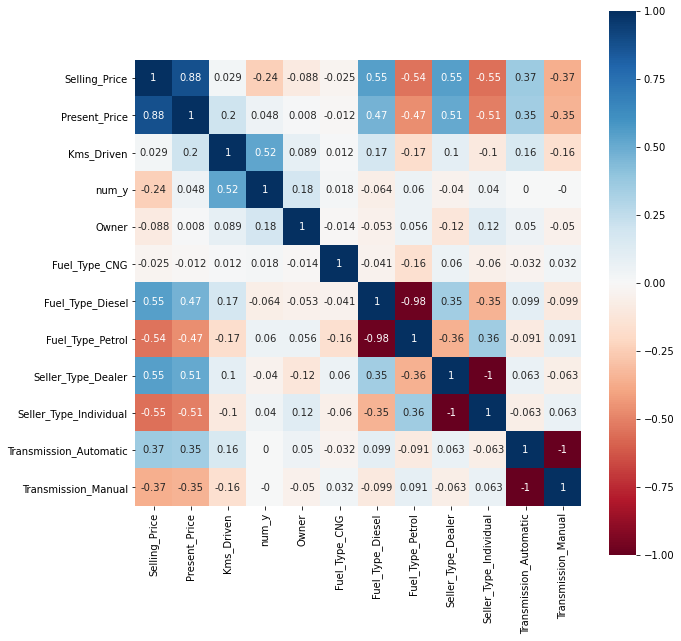

In [298]:
plt.figure(figsize=(10,10))
ax = sns.heatmap( matrix,cmap ="RdBu", annot =True, vmin=-1, vmax =1 , center =0, square =True)

#### NOTE: On the heatmap representation each cell below the main diagonal is reflected about the main diagonal. Thus, the bottom segment below the main diagonal,  is identical to the top segment above the main diagonal. 

#### To simplified representation we hide the above repeated segment of the heatmap.

In [299]:
mask =np.triu(np.ones_like(matrix, dtype = bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False, False, False,
         True,  True

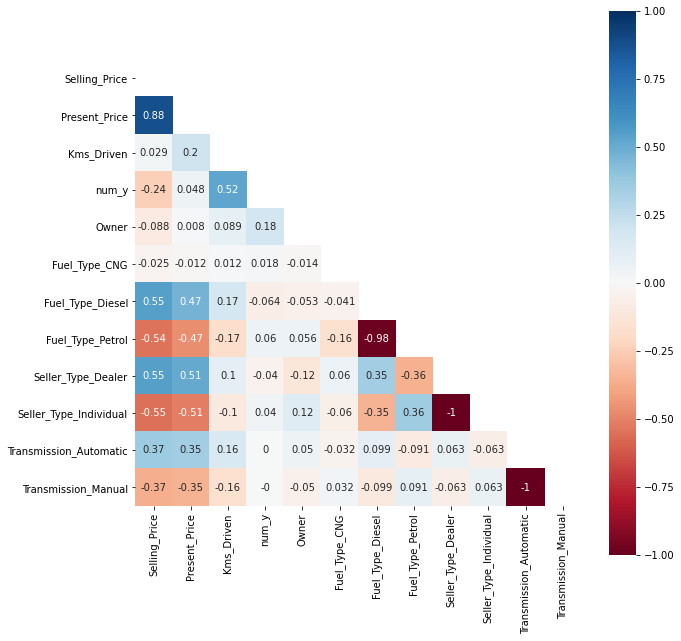

In [300]:
plt.figure(figsize=(10,10))
ax_mask = sns.heatmap(matrix, cmap ="RdBu", annot =True, vmin=-1, vmax =1,center =0, square =True, mask = mask)

#### NOTE: The best way to analyizing correlation matrix is to first unstack the correlation matrix as below:

In [301]:
matrix =matrix .unstack()
matrix 

Selling_Price        Selling_Price             1.000
                     Present_Price             0.879
                     Kms_Driven                0.029
                     num_y                    -0.236
                     Owner                    -0.088
                                               ...  
Transmission_Manual  Fuel_Type_Petrol          0.091
                     Seller_Type_Dealer       -0.063
                     Seller_Type_Individual    0.063
                     Transmission_Automatic   -1.000
                     Transmission_Manual       1.000
Length: 144, dtype: float64

### 4.) Data split (80/20 ratio) 
#### Data splitting such that 80% of the data is used for training subset the model and 20% is used to test subset.

In [302]:
X = final_dataset.drop('Selling_Price', axis = 1); Y=final_dataset['Selling_Price'] # Separating the Feature vectors or columns form target column(series)

from sklearn.model_selection import train_test_split  # Importing the train_test_split function.

# Splitting the data: 80% training data and 20% testing data. Then setting the random_state to 42 (arbitary selected) for the same random state for iteration
x_train,x_test, y_train, y_test = train_test_split(X,Y, test_size =0.2,random_state = 42)

### 4.1) Examine the data dimension

#### Here we see that the training set has 240 rows and 11 columns which is equivalent to 80% of the entire dataset, where there 1600 rows and 1 column for the Y variable.
#### Then, also the testing set has 61 rows and 11 columns for the X variable which is equivalent to 20%  of the entire dataset, where there 400 rows and 1 column for the Y variable.

In [303]:
x_train.shape, y_train.shape 

((240, 11), (240,))

In [304]:
x_test.shape, y_test.shape 

((61, 11), (61,))

### 4.) Building and training a simple Machine Learning model using Random Forest Regressor

#### When training a model we don't want a model that will memorize the training data. We need a model to  generalize from the training data inorder to also be able to make prediction on an unseen data.
 
####  We start building a model with the Random forest with the following hyperparameters, n_estimators = 10, max_features = 5, n_jobs = -1 and the random_state = 42. Nextly, we will then explore hyperparameter( n_estimators and max_features) using the GridSearchCV.

In [305]:
# Import the RandomForestClassifier and the accurary_score
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import accuracy_score 

# Developing Random Forest (RF) Classifier algorithm:
# Now applying the Random Forest Classifier to build a classification model using the cl.fit() function on the training data.
RFr = RandomForestRegressor(n_estimators = 10, max_features=5,  n_jobs= -1, random_state = 42)
RFr.fit(x_train, y_train)     

RandomForestRegressor(max_features=5, n_estimators=10, n_jobs=-1,
                      random_state=42)

### 4.1) Evaluation metrics

#### In Machine Learning it is important to evaluate a model because we need to know how the model perform or how it will perform in the on an unseen data and to also deduce it needs to be improved. 

#### Evaluation metric is a way to quantify the performance of a Machine Learning model.


### 4.2) Below we employ the R-squared evalation metric to test our model.

####  R-squared indicate how well the model prediction approximate the true value, where 1 is the perfect fit and zero is the dummy-regressor predicting an average. In the sklearn R-squared evaluation metric is the default scoring method for all regressor's. 

#### It simple metric and it also simplify too much. Thus, it  might be important at other metrics like Mean Absolute Error (MAE), and  Root Mean Squared Error (RMSE). 


 #### MAE :- The average sum of the absolute value of the residual errors (errors). The absolute value assures that all errors remain positive.
 
 #### RMSE :- Taking the square of all errors, followed by taking their mean. Then, taking the square root of the final answer. Basically, RMSE is a build up from the Mean Squared Error (MSE). The problem with MSE is that it exaggerate the error by taking their square. Thus, MSE can be hard to understand. Hence we take the square root to have RMSE. RMSE make it easier to understand the error because it can be compared with MAE.

In [306]:
# Computing the accuracy using the R-squared metric and naming it RFr-accuracy.
RFr_accuracy =RFr.score(x_test,y_test)   
print(f"{RFr_accuracy*100 :.2f} % correct" ) # Print the accuracy. 

93.70 % correct


In [307]:
# Predition on the training dataset
ytest_pred =RFr.predict(x_test)
ytest_pred

array([ 0.396,  9.638,  5.035,  0.221,  6.83 ,  5.78 ,  1.088,  0.603,
        0.416,  6.715,  8.72 ,  1.016,  7.719,  0.615,  5.015,  3.185,
        1.08 , 12.102,  0.474,  1.56 ,  0.475,  8.77 ,  7.313,  3.035,
        0.555,  3.765,  5.365,  3.16 ,  1.145,  1.173,  0.53 , 10.36 ,
        0.481,  2.53 ,  7.7  ,  4.17 ,  5.53 ,  5.71 ,  3.14 ,  6.125,
        3.878,  4.085,  5.07 ,  0.476,  6.995,  0.665,  8.04 ,  8.29 ,
        2.995,  3.9  ,  5.03 ,  1.5  , 21.247, 23.325,  5.955,  7.605,
        5.245,  9.519,  2.73 ,  6.645,  0.3  ])

### 4.3)  Computing MAE and RMSE

In [308]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error

In [309]:
# The metrics 

# The MAE 
MAE= mean_absolute_error(y_test, ytest_pred )
print(f"{MAE*100:.2f} %")
#print('The MAE is: %.2f'mean_absolute_error(y_test, ytest_pred ))


# the RMSE 
RMSE=(np.sqrt(mean_squared_error(y_test, ytest_pred)))             
print(f"{RMSE*100 :.2f} %")


#print(f"{RF_accuracy*100 :.2f} % correct")   

69.68 %
120.46 %


### 5.) Hyperparameter Tuning 

####  Performing the hyperparameters tuning of the Random Forest model using the GridSearchCV. The GridSearchCV is used to search through hyper-parameters. 

#### The hyperparameters that are tuned are a.) n_estimators and the b.) max_features. 

In [310]:
# Firstly, we import the necessary modules. 
from sklearn.model_selection import GridSearchCV

import numpy as np  # Import numpy library again to execute this cell without the need to execute the first cell where is initial imported.

# The GridSearchCV function from scikit-learn will be used in performing the hyperparameter tuning. 
# Mainly, GridSearchCV() can be classified as a typical function of a classifier such as pridict(), fit() and score().

In [311]:
# Secondly, we define necessary input variables for the GridSearchCV() function.

max_features_range =np.arange(1,6,1)
n_estimators_range =np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

RFr=RandomForestRegressor()
# Inserting input into the  GridSearchCV() function.  
grid=GridSearchCV(estimator=RFr, param_grid=param_grid,cv =5)

In [312]:
# fitting the training data.
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [313]:
print(grid.best_params_, grid.best_score_)

{'max_features': 5, 'n_estimators': 40} 0.8734312767630998


In [314]:
grid_results =pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis =1)
grid_results.head(10)

,max_features,n_estimators,Accuracy
0,1,10,0.817983
1,1,20,0.806079
2,1,30,0.833768
3,1,40,0.813187
4,1,50,0.825679
5,1,60,0.817311
6,1,70,0.831307
7,1,80,0.820653
8,1,90,0.820473
9,1,100,0.825630


In [315]:
# Firstly, we use Pandas' groupby() function to segment the data into groups based on our two hyperparamters.

grid_contour =grid_results.groupby(["max_features", "n_estimators"]).mean()
grid_contour

Accuracy
max_features n_estimators          
1            10            0.817983
             20            0.806079
             30            0.833768
             40            0.813187
             50            0.825679
...                             ...
5            160           0.860492
             170           0.862152
             180           0.864303
             190           0.862853
             200           0.856000

[100 rows x 1 columns]

In [316]:
grid_reset = grid_contour.reset_index()
grid_reset.columns=["max_features","n_estimators","Accuracy"]
grid_pivot =grid_reset.pivot("max_features","n_estimators")
grid_pivot

Accuracy                                                    \
n_estimators       10        20        30        40        50        60    
max_features                                                               
1             0.817983  0.806079  0.833768  0.813187  0.825679  0.817311   
2             0.795514  0.838796  0.838039  0.828387  0.817809  0.845259   
3             0.852853  0.843016  0.857547  0.844068  0.853682  0.841566   
4             0.852403  0.844792  0.849987  0.857201  0.850074  0.853711   
5             0.839371  0.839979  0.846332  0.873431  0.856423  0.854105   

                                                                          \
n_estimators       70        80        90        100       110       120   
max_features                                                               
1             0.831307  0.820653  0.820473  0.825630  0.815402  0.818933   
2             0.824589  0.837131  0.841656  0.837661  0.835681  0.835145   
3             0.845046  0.847487  0.843408  0.845831  0.841669  0.840928   
4             0.853421  0.847868  0.855386  0.856079  0.842188  0.853342   
5             0.859040  0.854955  0.863497  0.862557  0.861383  0.864381   

                                                                          \
n_estimators       130       140       150       160       170       180   
max_features                                                               
1             0.820714  0.823762  0.824662  0.826914  0.830528  0.824887   
2             0.841429  0.842523  0.837531  0.834347  0.836289  0.839483   
3             0.848353  0.851180  0.851371  0.847348  0.849742  0.848638   
4             0.857512  0.856786  0.851663  0.849850  0.846255  0.862443   
5             0.857533  0.858987  0.859824  0.860492  0.862152  0.864303   

                                  
n_estimators       190       200  
max_features                      
1             0.823548  0.821728  
2             0.836582  0.833469  
3             0.839757  0.845909  
4             0.861232  0.856591  
5             0.862853  0.856000

In [317]:
#Finally we assign the pivoted data into the respective, x,y,z varibles

x = grid_pivot.columns.levels[1].values
y =grid_pivot.index.values
z =grid_pivot.values

In [318]:
x

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200], dtype=int64)

In [319]:
y

array([1, 2, 3, 4, 5], dtype=int64)

In [320]:
z

array([[0.81798312, 0.80607893, 0.83376788, 0.81318687, 0.82567906,
        0.81731124, 0.83130668, 0.82065275, 0.82047302, 0.82563007,
        0.81540201, 0.81893348, 0.82071407, 0.82376161, 0.82466161,
        0.82691386, 0.83052784, 0.82488709, 0.82354772, 0.82172805],
       [0.79551423, 0.8387956 , 0.838039  , 0.8283866 , 0.81780948,
        0.8452594 , 0.82458917, 0.83713054, 0.84165635, 0.83766068,
        0.83568084, 0.83514496, 0.84142947, 0.84252264, 0.83753088,
        0.83434655, 0.83628902, 0.839483  , 0.8365818 , 0.83346924],
       [0.85285338, 0.84301618, 0.85754678, 0.84406775, 0.85368185,
        0.84156559, 0.84504598, 0.84748704, 0.84340788, 0.84583088,
        0.84166859, 0.8409279 , 0.84835313, 0.85117989, 0.8513715 ,
        0.84734792, 0.8497422 , 0.84863802, 0.83975749, 0.8459086 ],
       [0.85240284, 0.84479244, 0.8499869 , 0.85720147, 0.85007366,
        0.85371083, 0.85342057, 0.8478683 , 0.85538579, 0.85607863,
        0.84218794, 0.85334242, 0.8575119 , 0

### 7.) 3D Surface Plot

#### Representation of the accuracy as a function of n_estimators and max_features using a  3D plot surface plot. 

#### To get a clear understand of the reationship of accuracy as a function of n_estimators and max_features  we must first understand the relationship between the two hyperparameters.  This is done below with a 2D contour plot.

In [321]:
import plotly.graph_objects as go

# X and Y axes labels 
layout = go.Layout(
            xaxis=go.layout.XAxis(
                  title=go.layout.xaxis.Title(
                  text ="n_estimators")
            ),
            yaxis=go.layout.YAxis(
            title=go.layout.yaxis.Title(
            text = "max_features")
            ))

fig = go.Figure(data =[go.Surface(z=z,y=y,x=x)],layout=layout)

fig.update_layout(title ="Hyperparameter tunning",
                 scene=dict(
                       xaxis_title ="n_estimators",
                       yaxis_title = "max_features",
                       zaxis_title ="Accuracy"),
                       autosize = False,
                       width=800, height=800,
                       margin=dict(l=65,r=50, b=65, t=90))

fig.show()

### 8.) 2D Contour Plot
#### Now, we visualizing the landscape of the 2 hyperparameters that we are tuning and the accuracy score influence. 

In [322]:

fig=go.Figure(data=[go.Contour(z=z,x=x,y=y)],layout=layout)

fig.update_layout(title ="Hyperparameter tuning", 
                 autosize=False,
                 width=500, height=500,
                 margin=dict(l=65, r=50, b=65,t=90))
fig.show()